In [64]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd 

from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
df = pd.read_csv("./CarPrice_Assignment.csv")

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.shape

(205, 26)

In [7]:
pd.DataFrame(df.nunique(), columns=['no of unique values'])

,no of unique values
car_ID,205
symboling,6
CarName,147
fueltype,2
aspiration,2
doornumber,2
carbody,5
drivewheel,3
enginelocation,2
wheelbase,53


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [9]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [13]:
df.describe().style.background_gradient(cmap = plt.get_cmap("Blues"))

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [19]:
numeric_col = [var for var in df.columns if df[var].dtype == "int64" or df[var].dtype == "float64"]
numeric_col

['car_ID',
 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [39]:
categorical_names = [var for var in df.columns if df[var].dtype == "object"]
categorical_names

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'company']

In [23]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [24]:
df['company'] = df['CarName'].apply(lambda x : x.split(" ")[0])
df['company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [25]:
plt.bar(data=df, x = df['company'].value_counts())

TypeError: bar() missing 1 required positional argument: 'height'

<Axes: >

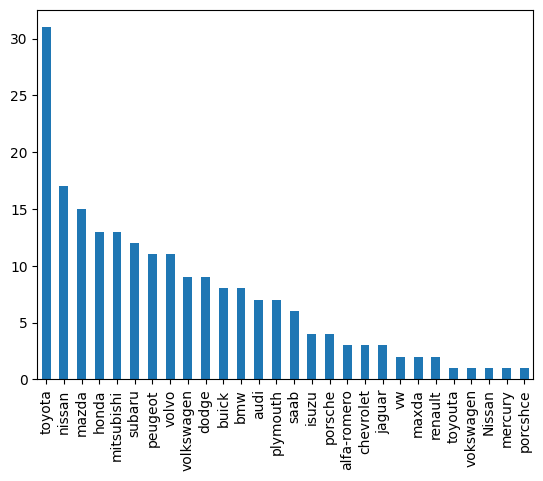

In [26]:
df['company'].value_counts().plot(kind='bar')

In [30]:
df['company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

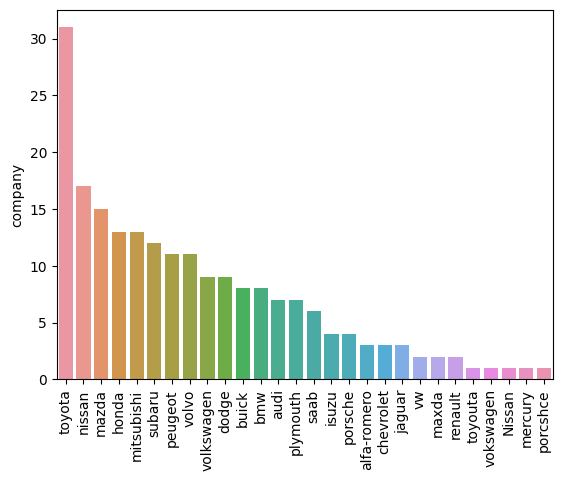

In [37]:
value_c = df['company'].value_counts()

sns.barplot(x = value_c.index, y = value_c)
plt.xticks(rotation=90);

In [40]:
categorical_names

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'company']

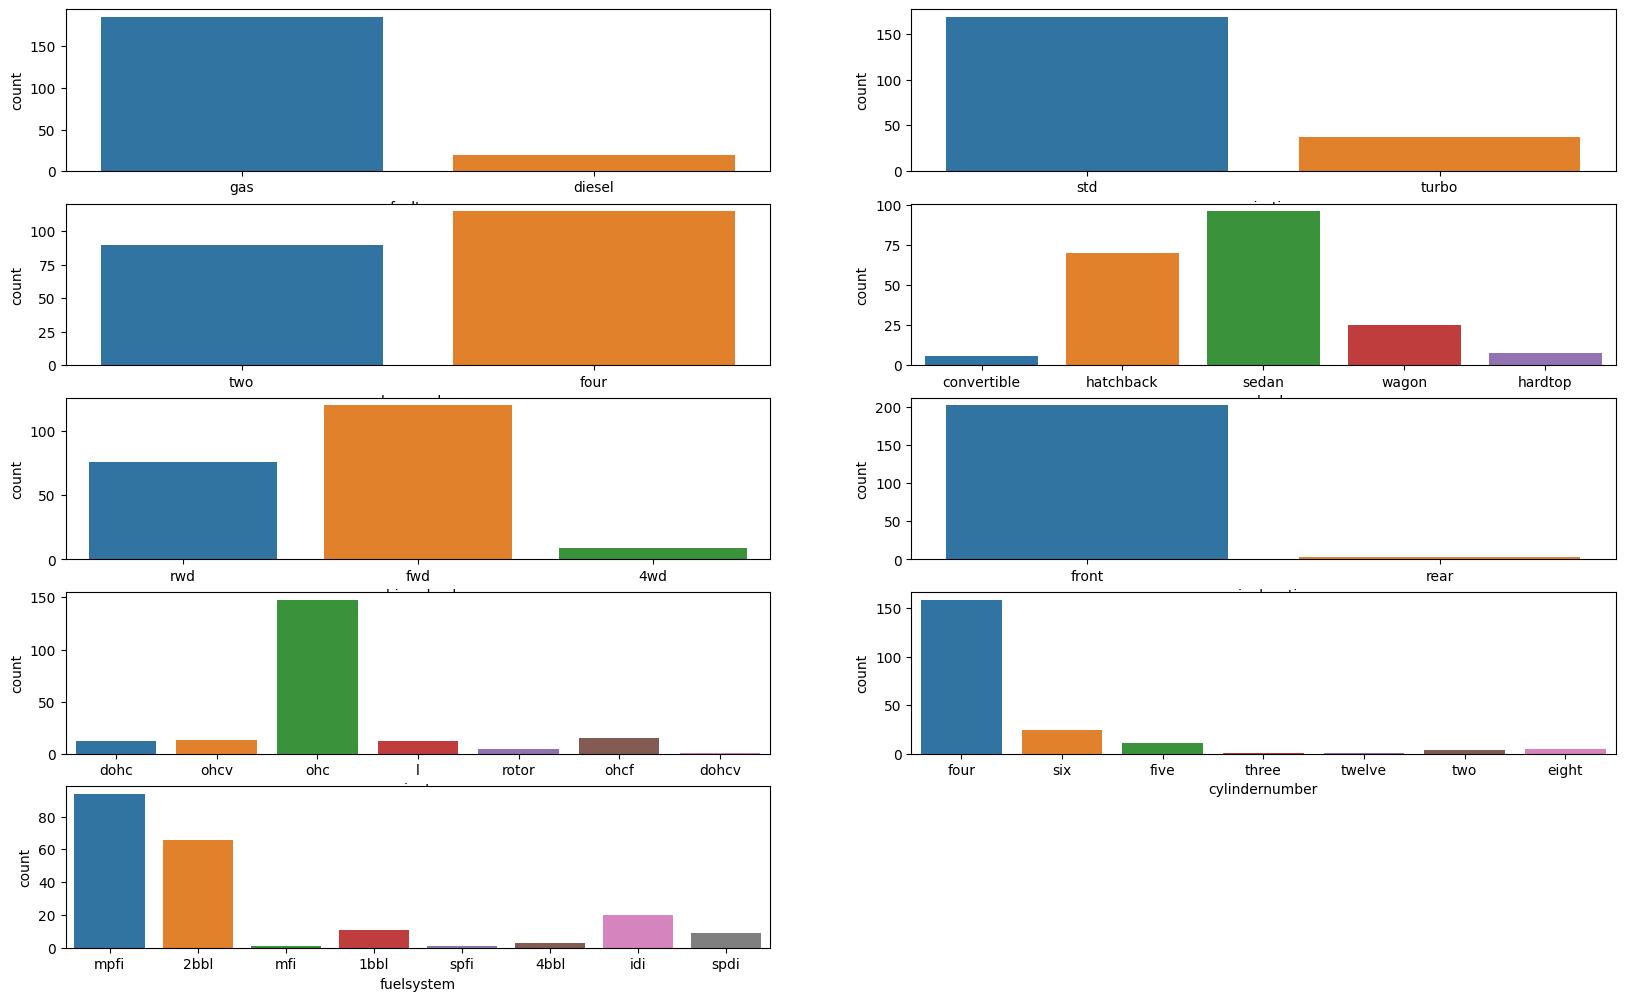

In [42]:
cat = df[[
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']]

plt.figure(figsize=(20,50))

for i in range(len(cat.columns)):
    
    plt.subplot(20,2,i+1)
    
    sns.countplot(x = cat.columns[i], data=cat)

# scaling the variable 

In [43]:
numeric_col

['car_ID',
 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [45]:
scale_col = [[
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']]

for i in scale_col:
    df[i] = np.log(df[i])

df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,4.484132,...,mpfi,1.244155,0.985817,2.197225,4.709530,8.517193,3.044522,3.295837,9.510075,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,4.484132,...,mpfi,1.244155,0.985817,2.197225,4.709530,8.517193,3.044522,3.295837,9.711116,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,4.548600,...,mpfi,0.985817,1.244155,2.197225,5.036953,8.517193,2.944439,3.258097,9.711116,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,4.603168,...,mpfi,1.160021,1.223775,2.302585,4.624973,8.612503,3.178054,3.401197,9.543235,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,4.599152,...,mpfi,1.160021,1.223775,2.079442,4.744932,8.612503,2.890372,3.091042,9.767095,audi


In [46]:
df.drop(columns=['car_ID', 'CarName', 'symboling'], inplace=True)

In [47]:
# confirming if the columns have been dropped

df.columns

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'company'],
      dtype='object')

# regression plot for numerical variable

In [48]:
numeric_col

['car_ID',
 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

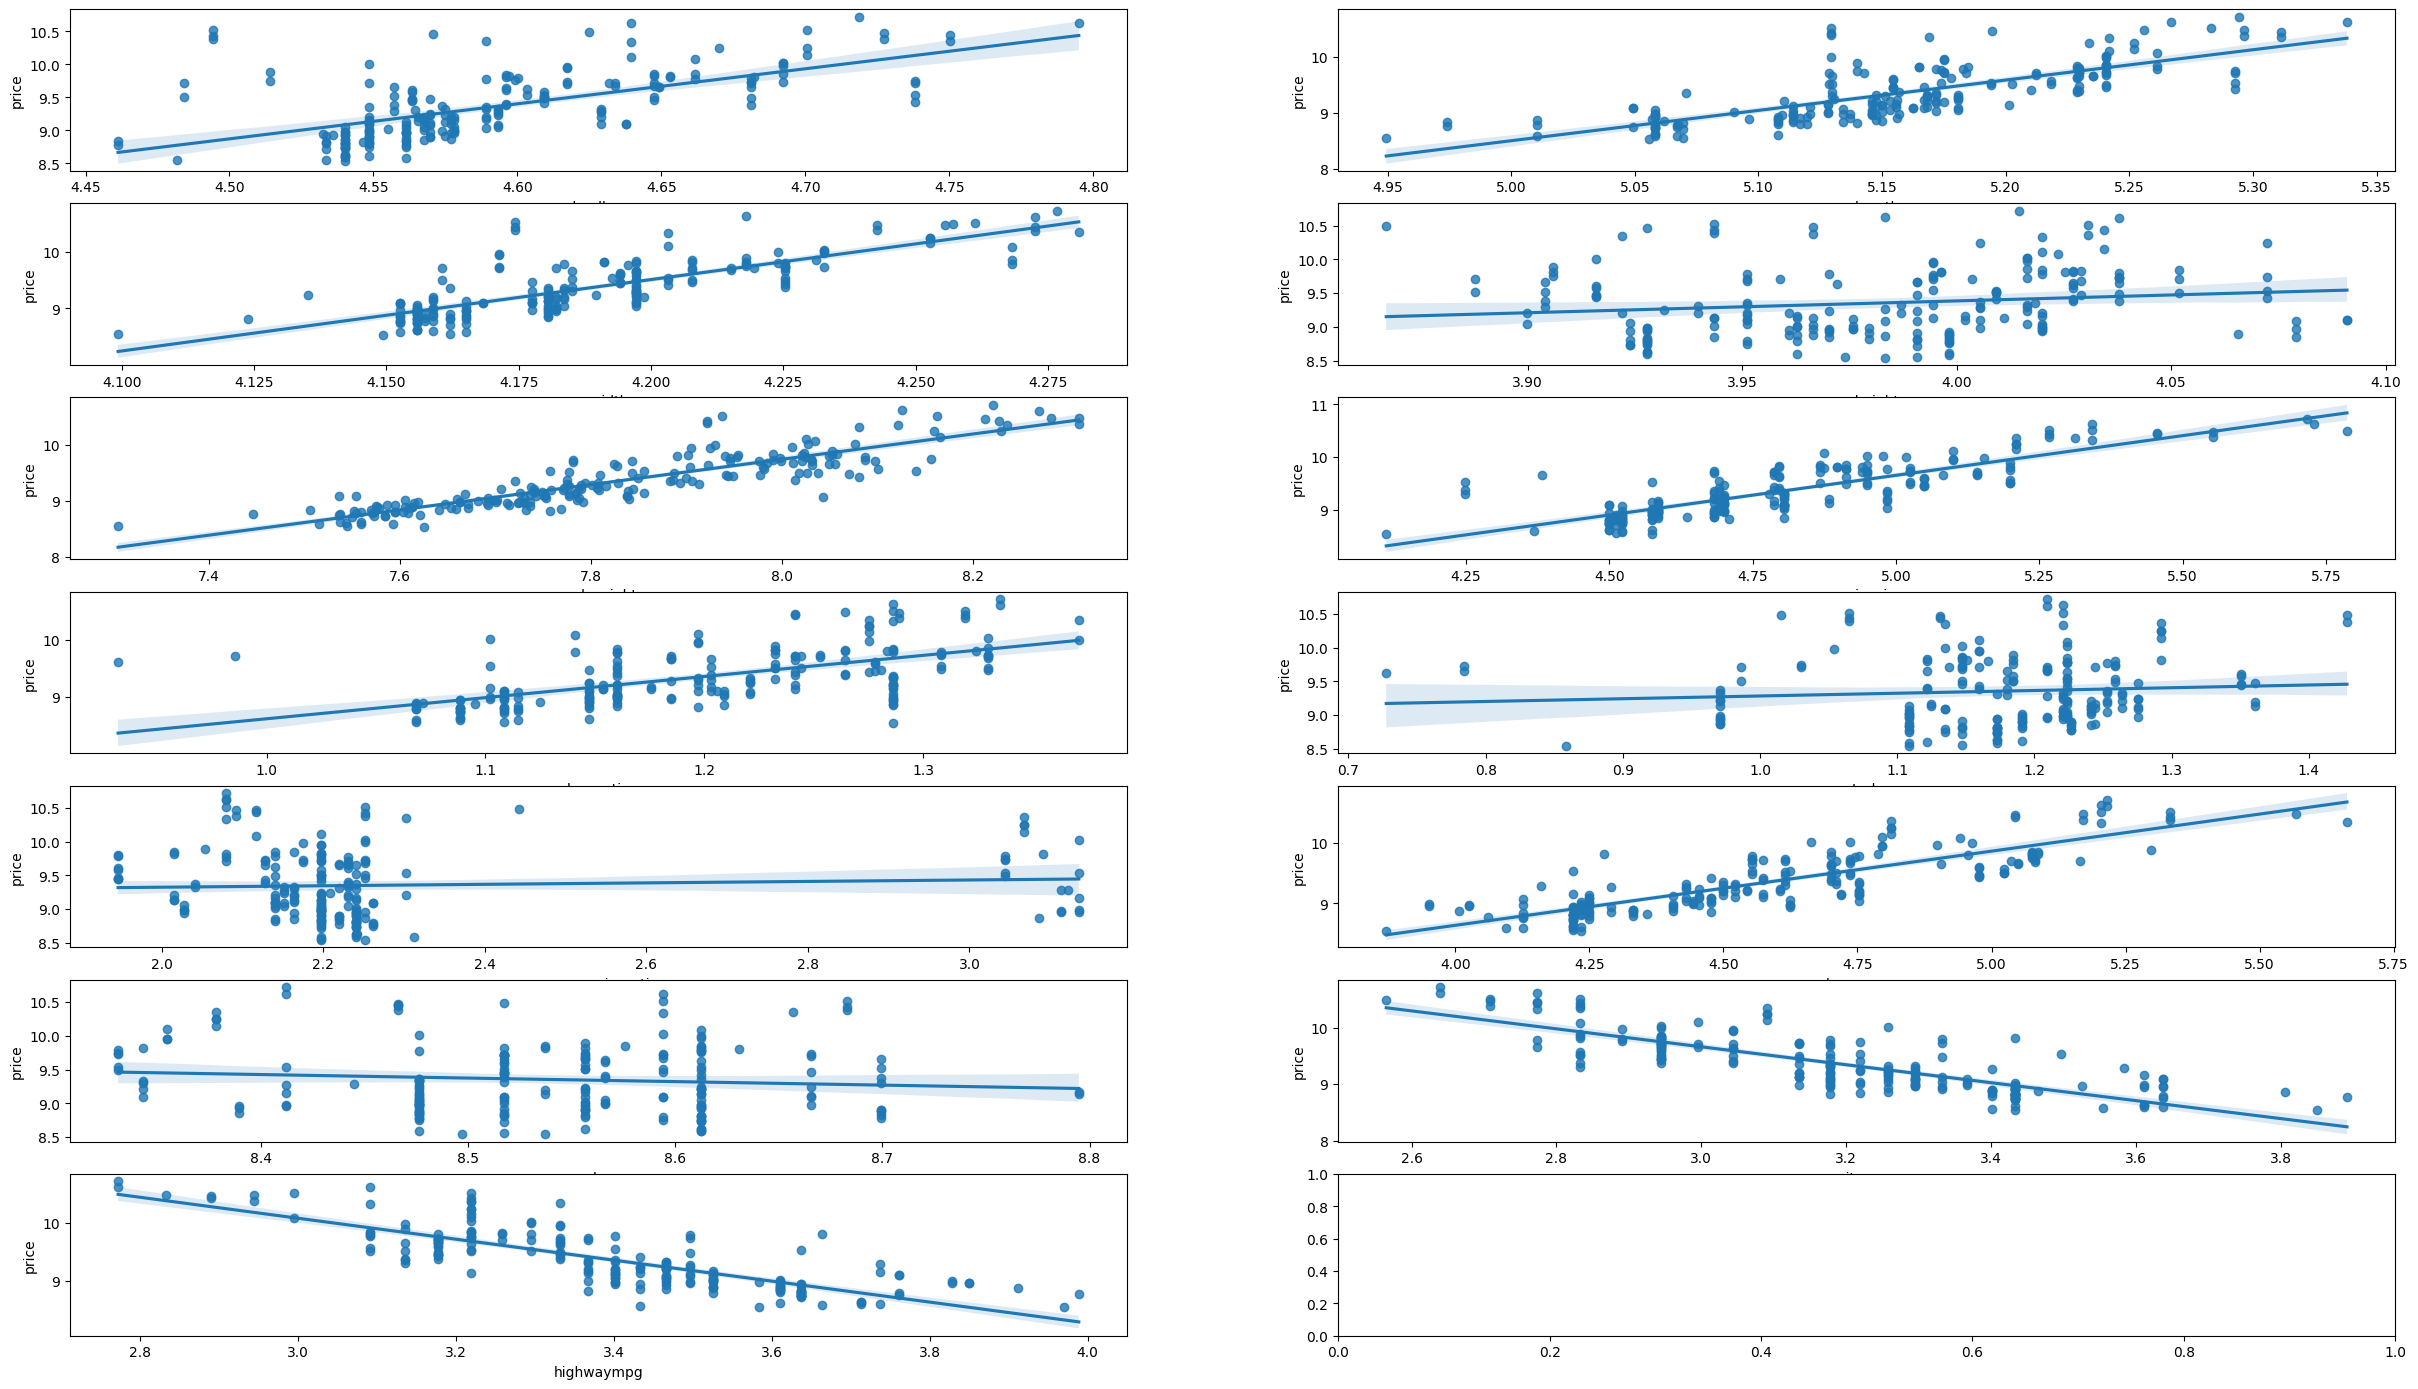

In [51]:
num = df[['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']]

plt.figure(figsize=(30,50))

for i in range(len(num.columns)):
    plt.subplot(20,2,i+1)
    
    if num.columns[i] == 'price':
        continue
    
    sns.regplot(x = num.columns[i], y = 'price', data=num)

<Axes: >

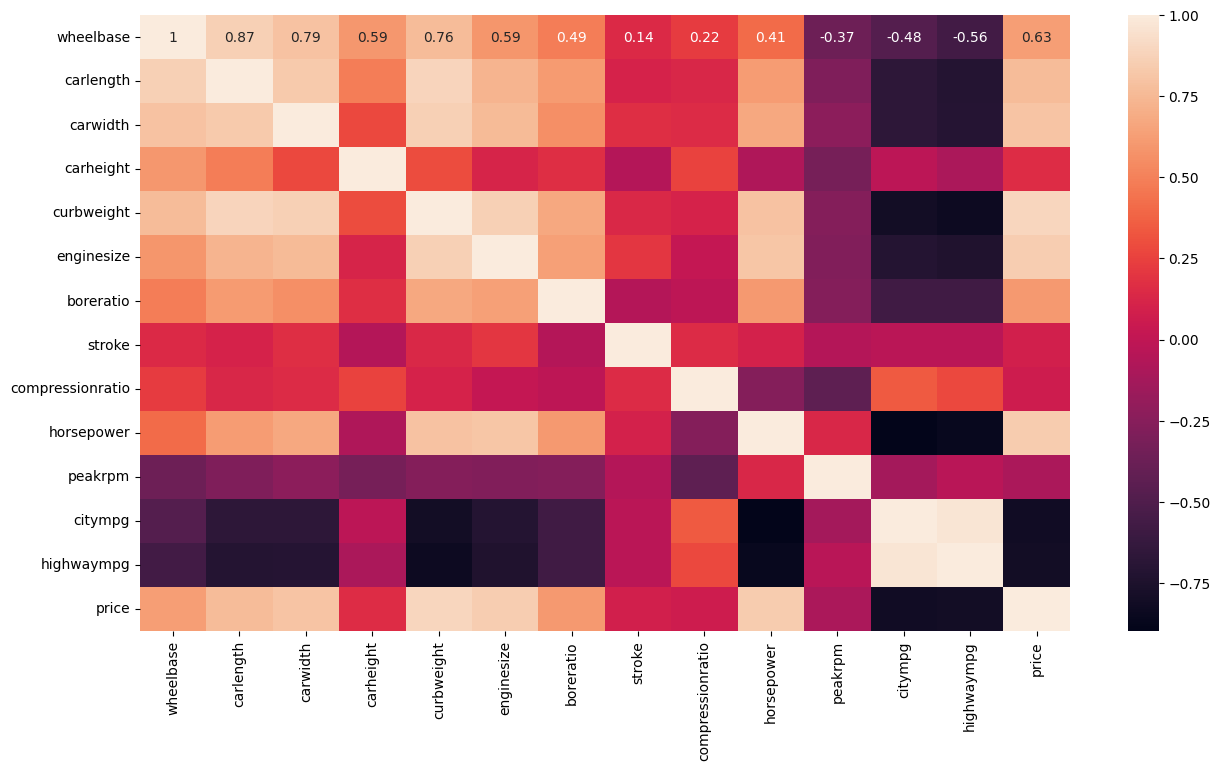

In [52]:
num = df[['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']]

plt.figure(figsize=(15,8))

sns.heatmap(num.corr(), annot=True)

In [57]:
a = df.corr()
a

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.865710,0.794296,0.592186,0.763036,0.589940,0.488205,0.142414,0.223305,0.412493,-0.368088,-0.477043,-0.564914,0.625168
carlength,0.865710,1.000000,0.836545,0.482292,0.886880,0.727933,0.613200,0.105690,0.130792,0.617354,-0.288340,-0.675107,-0.714754,0.763271
carwidth,0.794296,0.836545,1.000000,0.275401,0.861311,0.756579,0.558908,0.164584,0.153581,0.669126,-0.224115,-0.673926,-0.712720,0.802838
carheight,0.592186,0.482292,0.275401,1.000000,0.294226,0.116601,0.167342,-0.056030,0.255406,-0.076252,-0.324776,-0.016560,-0.091190,0.158864
curbweight,0.763036,0.886880,0.861311,0.294226,1.000000,0.864911,0.667418,0.133495,0.107443,0.792661,-0.261355,-0.804476,-0.837554,0.890683
enginesize,0.589940,0.727933,0.756579,0.116601,0.864911,1.000000,0.632898,0.201736,0.020233,0.813047,-0.275747,-0.719217,-0.737433,0.845738
boreratio,0.488205,0.613200,0.558908,0.167342,0.667418,0.632898,1.000000,-0.058745,-0.013458,0.603871,-0.262992,-0.577842,-0.578269,0.604542
stroke,0.142414,0.105690,0.164584,-0.056030,0.133495,0.201736,-0.058745,1.000000,0.152583,0.097000,-0.057375,-0.023744,-0.029458,0.082332
compressionratio,0.223305,0.130792,0.153581,0.255406,0.107443,0.020233,-0.013458,0.152583,1.000000,-0.266127,-0.435180,0.347250,0.280406,0.060110
horsepower,0.412493,0.617354,0.669126,-0.076252,0.792661,0.813047,0.603871,0.097000,-0.266127,1.000000,0.128955,-0.898624,-0.859803,0.842740


In [58]:
categorical_names

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'company']

In [61]:
cat = [
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'company']

In [62]:
df_dummy = pd.get_dummies(data=df, prefix=cat, columns=cat, drop_first=True)
df_dummy

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_toyouta,company_vokswagen,company_volkswagen,company_volvo,company_vw
0,4.484132,5.128715,4.160444,3.887730,7.843064,4.867534,1.244155,0.985817,2.197225,4.709530,...,0,0,0,0,0,0,0,0,0,0
1,4.484132,5.128715,4.160444,3.887730,7.843064,4.867534,1.244155,0.985817,2.197225,4.709530,...,0,0,0,0,0,0,0,0,0,0
2,4.548600,5.142832,4.182050,3.958907,7.945555,5.023881,0.985817,1.244155,2.197225,5.036953,...,0,0,0,0,0,0,0,0,0,0
3,4.603168,5.173887,4.192680,3.994524,7.756623,4.691348,1.160021,1.223775,2.302585,4.624973,...,0,0,0,0,0,0,0,0,0,0
4,4.599152,5.173887,4.195697,3.994524,7.945910,4.912655,1.160021,1.223775,2.079442,4.744932,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,4.692265,5.240688,4.232656,4.016383,7.990238,4.948760,1.329724,1.147402,2.251292,4.736198,...,0,0,0,0,0,0,0,0,1,0
201,4.692265,5.240688,4.231204,4.016383,8.022569,4.948760,1.329724,1.147402,2.163323,5.075174,...,0,0,0,0,0,0,0,0,1,0
202,4.692265,5.240688,4.232656,4.016383,8.010360,5.153292,1.275363,1.054312,2.174752,4.897840,...,0,0,0,0,0,0,0,0,1,0
203,4.692265,5.240688,4.232656,4.016383,8.076205,4.976734,1.101940,1.223775,3.135494,4.663439,...,0,0,0,0,0,0,0,0,1,0


In [74]:
x = df_dummy.drop('price', axis=1)
y = df_dummy['price']

In [75]:
print(x.shape, y.shape)

(205, 69) (205,)


In [81]:
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size=.2, random_state=42)

In [82]:
x_train.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'fueltype_gas', 'aspiration_turbo',
       'doornumber_two', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'company_alfa-romero',
       'company_audi', 'company_bmw', 'company_buick', 'company_chevrolet',
       'company_dodge', 'company_honda', 'company_isuzu', 'company_jaguar',


In [83]:
model = LinearRegression()
model.fit(x_train, y_train)

y_predict = model.predict(x_test)


In [84]:
pd.DataFrame({"actual" : y_test, "predicted" : y_predict})

,actual,predicted
15,10.333970,10.265180
9,9.790272,10.053438
100,9.164192,9.195539
132,9.380083,9.423925
68,10.248778,10.221787
95,8.961751,8.869070
159,8.960339,8.992007
162,9.133243,8.919059
147,9.229947,9.168249
182,8.958669,8.944923


In [88]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error

In [90]:


print(f"MAE : {mean_absolute_error(y_test, y_predict)}")
print(f"MSE : {mean_squared_error(y_test, y_predict)}")
print(f"R-squared : {r2_score(y_test, y_predict)}")

MAE : 0.10708611261981534
MSE : 0.0177053273012234
R-squared : 0.9347450483261267


In [91]:
y_train_pred = model.predict(x_train)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

In [92]:
print("Training Metrics:")
print(f"MAE: {train_mae}")
print(f"MSE: {train_mse}")
print(f"R^2: {train_r2}")

Training Metrics:
MAE: 0.06395378041943364
MSE: 0.006808265578189645
R^2: 0.9725356634833641


In [93]:
from sklearn.model_selection import cross_val_score

# Using 5-fold cross-validation
cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='r2')

print(f"Cross-Validation R^2 Scores: {cv_scores}")
print(f"Mean Cross-Validation R^2 Score: {cv_scores.mean()}")


Cross-Validation R^2 Scores: [ 8.85590752e-01  8.97770118e-01  8.37871920e-01  8.98054148e-01
 -1.54545365e+24]
Mean Cross-Validation R^2 Score: -3.09090729061164e+23


In [101]:
cof = model.coef_
cof

array([[ 0.09057559, -0.49350592,  0.22822709,  0.10190939, -0.02329158,
         1.60127666, -0.08230016, -0.0185651 , -0.02390133,  0.00897384,
         0.20592656,  0.45334737,  0.03158908,  0.13600543, -0.50764336,
         0.07899057,  0.07030182, -0.15109157, -0.75844201,  0.1086393 ]])